# Section 2

In [2]:
import os
import pandas as pd


In [ ]:
df=pd.read_excel('D:/hero/02 Office Supplies Orders Case Study Data.xlsx',sheet_name='Data')
df

# variables get read in Python in the right format

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        51290 non-null  object        
 1   Order Date      51290 non-null  datetime64[ns]
 2   Ship Date       51290 non-null  datetime64[ns]
 3   Ship Mode       51290 non-null  object        
 4   Customer ID     51290 non-null  object        
 5   Customer Name   51290 non-null  object        
 6   Segment         51290 non-null  object        
 7   Postal Code     9994 non-null   float64       
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Region          51290 non-null  object        
 12  Market          51290 non-null  object        
 13  Product ID      51290 non-null  object        
 14  Category        51290 non-null  object        
 15  Su

# variables having missing values

In [16]:
df.isnull().any()

Order ID          False
Order Date        False
Ship Date         False
Ship Mode         False
Customer ID       False
Customer Name     False
Segment           False
Postal Code        True
City              False
State             False
Country           False
Region            False
Market            False
Product ID        False
Category          False
Sub-Category      False
Product Name      False
Sales             False
Quantity          False
Discount          False
Profit            False
Shipping Cost     False
Order Priority    False
dtype: bool

In [17]:
df.isnull().sum()

Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
Postal Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [19]:
df.shape

(51290, 23)

#  list of variables for which missings values exist 

In [21]:
l=list(df.columns[df.isnull().any()])
l

['Postal Code']

# Percentage % values of missing values of the variables

In [26]:
(df['Postal Code'].isnull().sum()/df.shape[0]).round(2) #percentage

0.81

# outliers for all affected variables

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,55190.379428,246.490581,3.476545,0.142908,28.610982,26.478567
std,32063.693350,487.565361,2.278766,0.212280,174.340972,57.251373
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.002000
25%,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [45]:
df['Postal Code'].describe()

count     9994.000000
mean     55190.379428
std      32063.693350
min       1040.000000
25%      23223.000000
50%      56430.500000
75%      90008.000000
max      99301.000000
Name: Postal Code, dtype: float64

<AxesSubplot:xlabel='Postal Code'>

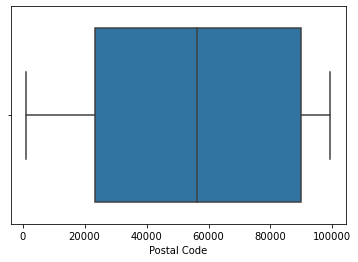

In [31]:
sns.boxplot(data=df,x='Postal Code')

In [42]:
df['Sales'].describe([0.01,0.05,0.1,0.9,0.95,0.99]).round(1)


count    51290.0
mean       246.5
std        487.6
min          0.4
1%           3.7
5%           8.8
10%         13.7
50%         85.1
90%        632.2
95%       1016.0
99%       2301.0
max      22638.5
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Sales'>

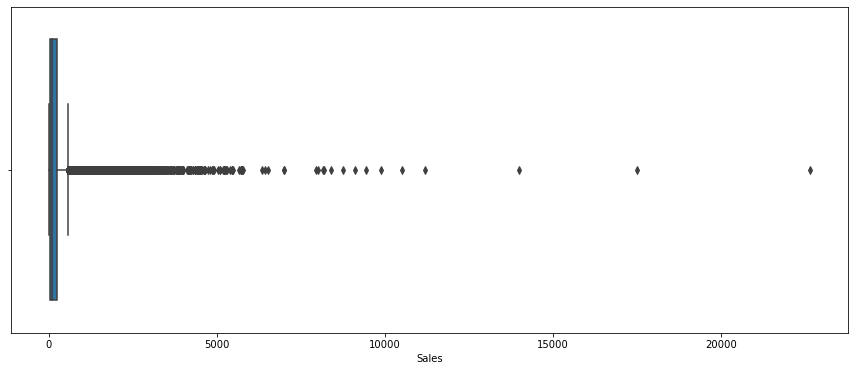

In [43]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df,x='Sales')

In [47]:
df['Quantity'].describe()

count    51290.000000
mean         3.476545
std          2.278766
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         14.000000
Name: Quantity, dtype: float64

<AxesSubplot:xlabel='Quantity'>

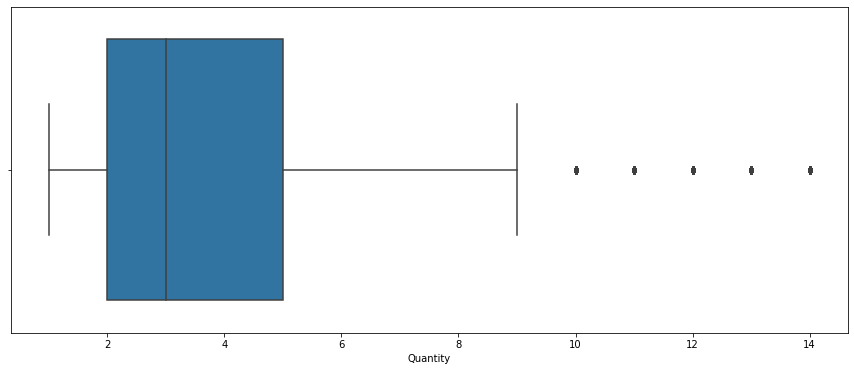

In [44]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df,x='Quantity')

In [48]:
df['Discount'].describe()

count    51290.000000
mean         0.142908
std          0.212280
min          0.000000
25%          0.000000
50%          0.000000
75%          0.200000
max          0.850000
Name: Discount, dtype: float64

<AxesSubplot:xlabel='Discount'>

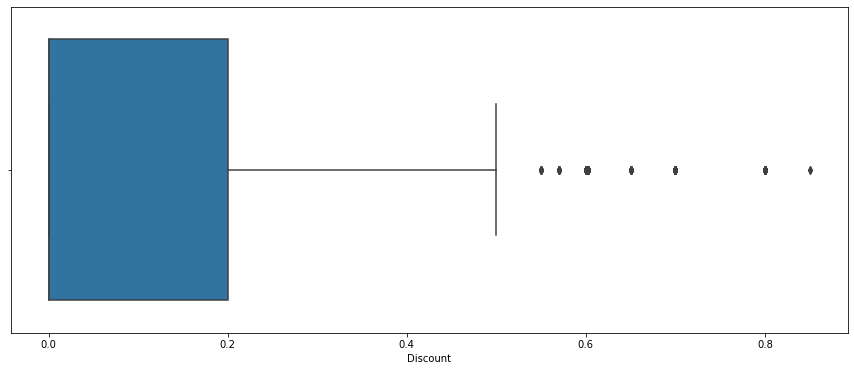

In [49]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df,x='Discount')

In [50]:
df['Profit'].describe()

count    51290.000000
mean        28.610982
std        174.340972
min      -6599.978000
25%          0.000000
50%          9.240000
75%         36.810000
max       8399.976000
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Profit'>

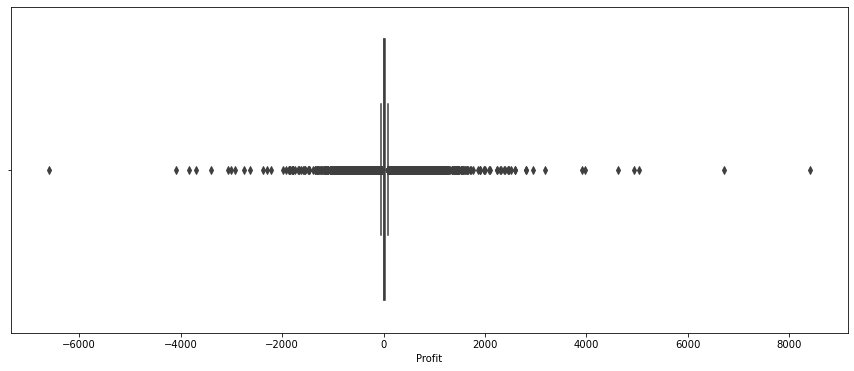

In [51]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df,x='Profit')

In [52]:
df['Shipping Cost'].describe()

count    51290.000000
mean        26.478567
std         57.251373
min          1.002000
25%          2.610000
50%          7.790000
75%         24.450000
max        933.570000
Name: Shipping Cost, dtype: float64

<AxesSubplot:xlabel='Shipping Cost'>

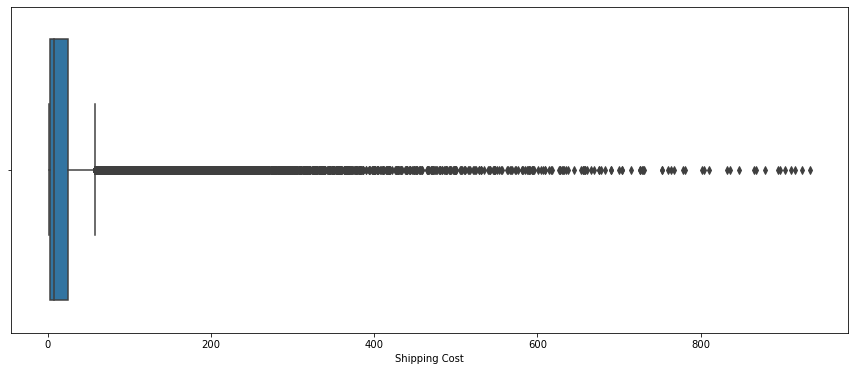

In [53]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df,x='Shipping Cost')

# cleaning of data

In [54]:
df.isnull()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
51286,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51287,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51288,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
df.isnull().all()

Order ID          False
Order Date        False
Ship Date         False
Ship Mode         False
Customer ID       False
Customer Name     False
Segment           False
Postal Code       False
City              False
State             False
Country           False
Region            False
Market            False
Product ID        False
Category          False
Sub-Category      False
Product Name      False
Sales             False
Quantity          False
Discount          False
Profit            False
Shipping Cost     False
Order Priority    False
dtype: bool

In [56]:
df.isnull().any()

Order ID          False
Order Date        False
Ship Date         False
Ship Mode         False
Customer ID       False
Customer Name     False
Segment           False
Postal Code        True
City              False
State             False
Country           False
Region            False
Market            False
Product ID        False
Category          False
Sub-Category      False
Product Name      False
Sales             False
Quantity          False
Discount          False
Profit            False
Shipping Cost     False
Order Priority    False
dtype: bool

In [57]:
df.columns[df.isnull().any()]

Index(['Postal Code'], dtype='object')

In [64]:
df.dropna(how='any')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
8,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,FUR-BO-5957,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",341.960,2,0.0,54.7136,25.27,High
9,CA-2012-AB10015140-40974,2012-03-06,2012-03-07,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,Washington,...,FUR-CH-4421,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",48.712,1,0.2,5.4801,11.13,High
10,CA-2012-AB10015140-40974,2012-03-06,2012-03-07,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,Washington,...,OFF-AR-5309,Office Supplies,Art,Newell 330,17.940,3,0.0,4.6644,4.29,High
16,CA-2012-AB10015140-40958,2012-02-19,2012-02-25,Standard Class,AB-100151402,Aaron Bergman,Consumer,76017.0,Arlington,Texas,...,OFF-ST-3078,Office Supplies,Storage,Akro Stacking Bins,12.624,2,0.2,-2.5248,1.97,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51271,CA-2014-ZD21925140-41733,2014-04-04,2014-04-10,Standard Class,ZD-219251402,Zuschuss Donatelli,Consumer,47374.0,Richmond,Indiana,...,FUR-FU-5983,Furniture,Furnishings,"Seth Thomas 13 1/2"" Wall Clock",71.120,4,0.0,22.0472,7.30,Medium
51276,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,California,...,OFF-BI-6395,Office Supplies,Binders,"Wilson Jones Hanging View Binder, White, 1""",22.720,4,0.2,7.3840,3.21,High
51280,CA-2014-ZD21925140-41829,2014-07-09,2014-07-09,Same Day,ZD-219251408,Zuschuss Donatelli,Consumer,32216.0,Jacksonville,Florida,...,OFF-PA-6474,Office Supplies,Paper,Xerox 1921,15.984,2,0.2,4.9950,2.01,Medium
51286,US-2014-ZD21925140-41765,2014-05-06,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,Tennessee,...,FUR-FU-4070,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.720,5,0.2,3.3440,1.93,High


In [67]:
d=df.dropna(how='any',axis=1)
d

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,United States,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.770,High
1,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical
2,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,Australia,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium
3,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,Germany,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium
4,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,Senegal,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,Kure,Hiroshima,Japan,...,OFF-FA-3072,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,1.010,Medium
51286,US-2014-ZD21925140-41765,2014-05-06,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,Chattanooga,Tennessee,United States,...,FUR-FU-4070,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.720,5,0.2,3.3440,1.930,High
51287,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,San Francisco,California,United States,...,OFF-AR-5321,Office Supplies,Art,Newell 341,8.560,2,0.0,2.4824,1.580,High
51288,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,RB-1979518,Ross Baird,Home Office,Valinhos,São Paulo,Brazil,...,OFF-BI-2919,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,1.003,Medium


In [69]:
df[df['Postal Code'].isnull()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
1,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.765,923.630,Critical
2,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.971,915.490,Medium
3,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.540,910.160,Medium
4,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.520,903.040,Critical
5,IN-2014-JM156557-41818,2014-06-28,2014-07-01,Second Class,JM-156557,Jim Mitchum,Corporate,NaN,Sydney,New South Wales,...,TEC-PH-5842,Technology,Phones,"Samsung Smart Phone, with Caller ID",2862.675,5,0.1,763.275,897.350,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51283,IN-2015-KH1633058-42154,2015-05-30,2015-05-30,Same Day,KH-1633058,Katharine Harms,Corporate,NaN,Lucknow,Uttar Pradesh,...,OFF-PA-4007,Office Supplies,Paper,"Eaton Parchment Paper, Premium",26.940,2,0.0,1.860,1.010,High
51284,MX-2013-KM1637593-41636,2013-12-28,2013-12-31,First Class,KM-1637593,Katherine Murray,Home Office,NaN,Managua,Managua,...,OFF-PA-5876,Office Supplies,Paper,"SanDisk Message Books, 8.5 x 11",18.640,1,0.0,8.000,1.010,Medium
51285,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,Hiroshima,...,OFF-FA-3072,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.500,1.010,Medium
51288,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,São Paulo,...,OFF-BI-2919,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.400,1.003,Medium


In [70]:
df[~df['Postal Code'].isnull()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
8,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,FUR-BO-5957,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",341.960,2,0.0,54.7136,25.27,High
9,CA-2012-AB10015140-40974,2012-03-06,2012-03-07,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,Washington,...,FUR-CH-4421,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",48.712,1,0.2,5.4801,11.13,High
10,CA-2012-AB10015140-40974,2012-03-06,2012-03-07,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,Washington,...,OFF-AR-5309,Office Supplies,Art,Newell 330,17.940,3,0.0,4.6644,4.29,High
16,CA-2012-AB10015140-40958,2012-02-19,2012-02-25,Standard Class,AB-100151402,Aaron Bergman,Consumer,76017.0,Arlington,Texas,...,OFF-ST-3078,Office Supplies,Storage,Akro Stacking Bins,12.624,2,0.2,-2.5248,1.97,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51271,CA-2014-ZD21925140-41733,2014-04-04,2014-04-10,Standard Class,ZD-219251402,Zuschuss Donatelli,Consumer,47374.0,Richmond,Indiana,...,FUR-FU-5983,Furniture,Furnishings,"Seth Thomas 13 1/2"" Wall Clock",71.120,4,0.0,22.0472,7.30,Medium
51276,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,California,...,OFF-BI-6395,Office Supplies,Binders,"Wilson Jones Hanging View Binder, White, 1""",22.720,4,0.2,7.3840,3.21,High
51280,CA-2014-ZD21925140-41829,2014-07-09,2014-07-09,Same Day,ZD-219251408,Zuschuss Donatelli,Consumer,32216.0,Jacksonville,Florida,...,OFF-PA-6474,Office Supplies,Paper,Xerox 1921,15.984,2,0.2,4.9950,2.01,Medium
51286,US-2014-ZD21925140-41765,2014-05-06,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,Tennessee,...,FUR-FU-4070,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.720,5,0.2,3.3440,1.93,High


# Duplicate values

In [84]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
51285    False
51286    False
51287    False
51288    False
51289    False
Length: 51290, dtype: bool

In [80]:
df.duplicated().sum()

0

# EDD

In [108]:
#frequency distribution
for i in df.columns:
    print(i,'\n',df[i].value_counts(),'\n')

Order ID 
 CA-2015-SV20365140-42268    14
TO-2015-AB600131-42299      13
IN-2013-TB21055113-41562    13
IN-2014-MH1778527-41697     13
NI-2015-TC1098095-42033     13
                            ..
CA-2013-RW19540140-41307     1
CG-2014-KH636033-41867       1
AG-2012-AC4203-40915         1
UP-2013-LW6825137-41586      1
IZ-2014-AR54061-41733        1
Name: Order ID, Length: 25728, dtype: int64 

Order Date 
 2015-06-18    135
2015-11-18    127
2015-09-03    126
2015-11-20    118
2015-12-29    116
             ... 
2013-02-18      1
2012-04-23      1
2013-10-07      1
2013-05-27      1
2013-09-23      1
Name: Order Date, Length: 1430, dtype: int64 

Ship Date 
 2015-11-22    130
2015-09-07    115
2015-11-17    101
2015-12-07    101
2015-11-29    100
             ... 
2012-04-13      3
2012-01-25      3
2012-01-05      2
2012-01-03      2
2012-01-06      2
Name: Ship Date, Length: 1464, dtype: int64 

Ship Mode 
 Standard Class    30775
Second Class      10309
First Class        7505
Same

In [91]:
df['Order ID'].nunique()

25728

In [103]:
df['Order ID'].nunique()/df.shape[0]


0.5016182491713784

In [105]:
df['Order Date'].nunique()

1430

In [107]:
df['Order Date'].nunique()/df.shape[0]

0.027880678494833302

In [110]:
df['Ship Date'].nunique()

1464

In [115]:
df['Ship Date'].nunique()/df.shape[0]

0.028543575745759407

In [6]:
df['Ship Mode'].nunique()

4

In [121]:
df['Ship Mode'].nunique()/df.shape[0]

7.798791187365959e-05

In [123]:
df['Customer ID'].nunique()

17415

In [125]:
df['Customer ID'].nunique()/df.shape[0]

0.3395398713199454

In [127]:
df['Customer Name'].nunique()

796

In [129]:
df['Customer Name'].nunique()/df.shape[0]

0.015519594462858256

In [131]:
df['Segment'].nunique()

3

In [133]:
df['Segment'].nunique()/df.shape[0]

5.8490933905244686e-05

In [135]:
df['Postal Code'].nunique()

632

In [141]:
df['Postal Code'].nunique()/df.shape[0]

0.0123025930980698

In [143]:
df['City'].nunique()

3650

In [145]:
df['City'].nunique()/df.shape[0]

0.07116396958471437

In [148]:
df['State'].nunique()

1102

In [150]:
df['State'].nunique()/df.shape[0]

0.021485669721193215

In [152]:
df['Country'].nunique()

165

In [154]:
df['Country'].nunique()/df.shape[0]

0.003217001364788458

In [156]:
df['Region'].nunique()

23

In [158]:
df['Region'].nunique()/df.shape[0]

0.0004484304932735426

In [160]:
df['Market'].nunique()

5

In [162]:
df['Market'].nunique()/df.shape[0]

9.748488984207447e-05

In [164]:
df['Product ID'].nunique()

3788

In [166]:
df['Product ID'].nunique()/df.shape[0]

0.07385455254435562

In [168]:
df['Category'].nunique()

3

In [170]:
df['Category'].nunique()/df.shape[0]

5.8490933905244686e-05

In [172]:
df['Sub-Category'].nunique()

17

In [174]:
df['Sub-Category'].nunique()/df.shape[0]

0.00033144862546305323

In [176]:
df['Product Name'].nunique()

3788

In [178]:
df['Product Name'].nunique()/df.shape[0]

0.07385455254435562

In [181]:
df['Sales'].nunique()

27200

In [183]:
df['Sales'].nunique()/df.shape[0]

0.5303178007408852

In [186]:
df['Quantity'].nunique()

27200

In [190]:
df['Quantity'].nunique()/df.shape[0]

0.0002729576915578085

In [7]:
df['Discount'].nunique()

29

In [11]:
df['Discount'].nunique()/df.shape[0]

0.000565412361084032

In [13]:
df['Profit'].nunique()

28234

In [15]:
df['Profit'].nunique()/df.shape[0]

0.5504776759602261

In [17]:
df['Shipping Cost'].nunique()

16753

In [28]:
df['Shipping Cost'].nunique()/df.shape[0]

0.32663287190485474

In [21]:
df['Order Priority'].nunique()

4

In [23]:
df['Order Priority'].nunique()/df.shape[0]

7.798791187365959e-05

In [25]:
df.describe(include='object').T

,count,unique,top,freq
Order ID,51290,25728,CA-2015-SV20365140-42268,14
Ship Mode,51290,4,Standard Class,30775
Customer ID,51290,17415,SV-203651406,26
Customer Name,51290,796,Muhammed Yedwab,108
Segment,51290,3,Consumer,26518
City,51290,3650,New York City,915
State,51290,1102,California,2001
Country,51290,165,United States,9994
Region,51290,23,Western Europe,5883
Market,51290,5,Asia Pacific,14302


In [29]:
df.describe(include='all',percentiles=[0.01,0.05,0.25,0.50,0.75,0.95,0.99],datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,1%,5%,25%,50%,75%,95%,99%,max,std
Order ID,51290,25728,CA-2015-SV20365140-42268,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order Date,51290,NaN,NaN,NaN,2014-05-11 21:26:49.155780608,2012-01-01 00:00:00,2012-02-07 00:00:00,2012-06-02 00:00:00,2013-06-19 00:00:00,2014-07-08 00:00:00,2015-05-22 00:00:00,2015-11-25 00:00:00,2015-12-24 02:38:24,2015-12-31 00:00:00,NaN
Ship Date,51290,NaN,NaN,NaN,2014-05-15 20:42:42.745174528,2012-01-03 00:00:00,2012-02-11 00:00:00,2012-06-06 00:00:00,2013-06-23 00:00:00,2014-07-12 00:00:00,2015-05-26 00:00:00,2015-11-29 00:00:00,2015-12-29 00:00:00,2016-01-07 00:00:00,NaN
Ship Mode,51290,4,Standard Class,30775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer ID,51290,17415,SV-203651406,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Name,51290,796,Muhammed Yedwab,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment,51290,3,Consumer,26518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Postal Code,9994.0,NaN,NaN,NaN,55190.379428,1040.0,2149.0,10009.0,23223.0,56430.5,90008.0,98006.0,98115.0,99301.0,32063.69335
City,51290,3650,New York City,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,51290,1102,California,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
